**Different techniques for supervised learning**

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [38]:
data = pd.read_csv('train_class (1).csv', sep=';')

In [39]:
dados.head()

,companhia,receitas,ativos,passivos,depreciacao,ganhosPorAcao,temDivida
0,1750.0,-9.990000e+02,1.442100e+09,-999.0,-999.0,1.37,0.0
1,1800.0,-9.990000e+02,4.124700e+10,-999.0,871000000.0,2.94,1.0
2,2034.0,-9.990000e+02,5.407780e+08,236336000.0,1522000.0,1.19,1.0
3,2098.0,1.098120e+08,8.142137e+07,38237805.0,1318357.0,1.44,0.0
4,2178.0,1.944279e+09,2.432150e+08,90705000.0,-999.0,-999.00,0.0


In [40]:
data.dtypes

companhia        float64
receitas         float64
ativos           float64
passivos         float64
depreciacao      float64
ganhosPorAcao    float64
temDivida        float64
dtype: object

In [41]:
data.isnull().sum() / len(data)

companhia        0.000000
receitas         0.556667
ativos           0.000000
passivos         0.251429
depreciacao      0.458810
ganhosPorAcao    0.335476
temDivida        0.000000
dtype: float64

<Axes: >

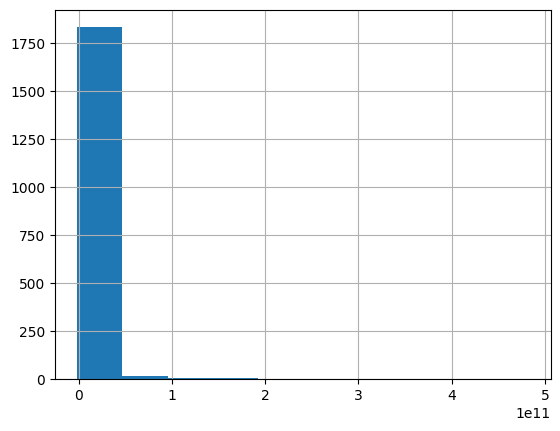

In [42]:
data['receitas'].hist()

<Axes: >

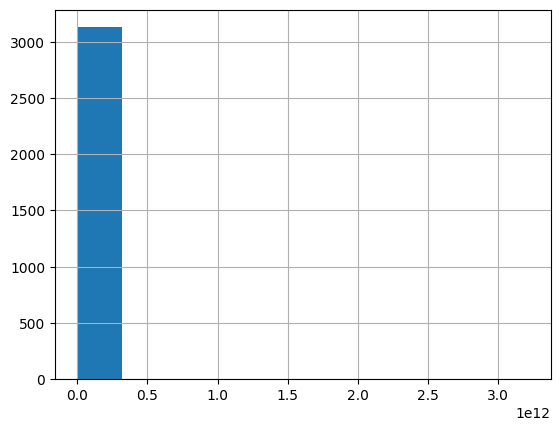

In [43]:
data['passivos'].hist()

<Axes: >

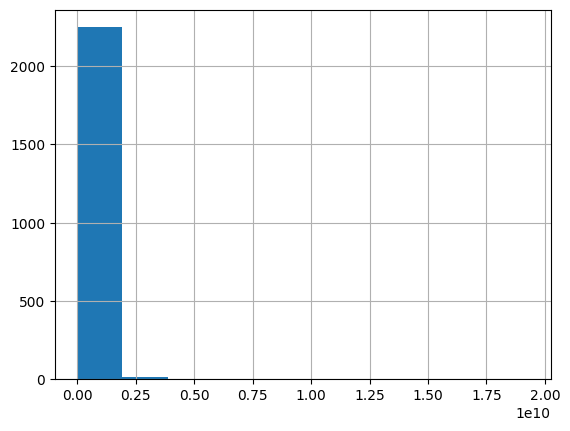

In [44]:
data['depreciacao'].hist()

<Axes: >

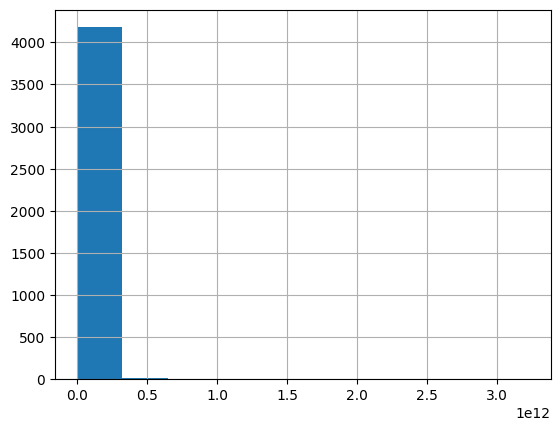

In [45]:
data['ativos'].hist()

In [46]:
data.fillna(-999, inplace=True)

In [47]:
data['receitas'].value_counts()

-9.990000e+02    2338
 0.000000e+00      73
 1.645320e+10       6
 1.788000e+10       6
 1.748900e+10       6
                 ... 
 1.672800e+09       1
 3.736750e+08       1
 6.405000e+07       1
 1.713088e+06       1
 3.996190e+08       1
Name: receitas, Length: 1709, dtype: int64

In [58]:
data.rename(columns={'temDivida':'target'}, inplace=True)

In [59]:
data.head()

,companhia,receitas,ativos,passivos,depreciacao,ganhosPorAcao,target
0,1750.0,-9.990000e+02,1.442100e+09,-999.0,-999.0,1.37,0.0
1,1800.0,-9.990000e+02,4.124700e+10,-999.0,871000000.0,2.94,1.0
2,2034.0,-9.990000e+02,5.407780e+08,236336000.0,1522000.0,1.19,1.0
3,2098.0,1.098120e+08,8.142137e+07,38237805.0,1318357.0,1.44,0.0
4,2178.0,1.944279e+09,2.432150e+08,90705000.0,-999.0,-999.00,0.0


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4200 entries, 0 to 4199
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   companhia      4200 non-null   float64
 1   receitas       4200 non-null   float64
 2   ativos         4200 non-null   float64
 3   passivos       4200 non-null   float64
 4   depreciacao    4200 non-null   float64
 5   ganhosPorAcao  4200 non-null   float64
 6   target         4200 non-null   float64
dtypes: float64(7)
memory usage: 229.8 KB


In [61]:
data.corr()

,companhia,receitas,ativos,passivos,depreciacao,ganhosPorAcao,target
companhia,1.000000,-0.108058,-0.094724,-0.070334,-0.085631,0.006418,-0.112539
receitas,-0.108058,1.000000,0.270705,0.181479,0.379146,-0.002239,0.034557
ativos,-0.094724,0.270705,1.000000,0.987888,0.141146,-0.001992,0.044100
passivos,-0.070334,0.181479,0.987888,1.000000,0.063653,-0.001468,0.032387
depreciacao,-0.085631,0.379146,0.141146,0.063653,1.000000,-0.002183,0.033025
ganhosPorAcao,0.006418,-0.002239,-0.001992,-0.001468,-0.002183,1.000000,-0.011909
target,-0.112539,0.034557,0.044100,0.032387,0.033025,-0.011909,1.000000


In [62]:
explanatory_variables = data.drop(columns=['companhia', 'target'])

In [63]:
explanatory_variables.columns

Index(['receitas', 'ativos', 'passivos', 'depreciacao', 'ganhosPorAcao'], dtype='object')

In [64]:
target = data['target']

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
x_train, x_validation, y_train, y_validation = train_test_split(explanatory_variables, target, train_size=0.7, random_state=42)

In [68]:
x_train.count()

receitas         2940
ativos           2940
passivos         2940
depreciacao      2940
ganhosPorAcao    2940
dtype: int64

In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [70]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [71]:
from xgboost import XGBClassifier

In [72]:
tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)
xg = XGBClassifier(random_state=42)

In [73]:
tree.fit(x_train, y_train)
random_forest.fit(x_train, y_train)
gb.fit(x_train, y_train)
xg.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [74]:
from sklearn.metrics import accuracy_score

In [76]:
accuracy_score(y_train, tree.predict(x_train))

1.0

In [77]:
accuracy_score(y_train, random_forest.predict(x_train))

1.0

In [78]:
accuracy_score(y_train, gb.predict(x_train))

0.763265306122449

In [79]:
accuracy_score(y_train, xg.predict(x_train))

0.9540816326530612

In [81]:
accuracy_score(y_validation, tree.predict(x_validation))

0.6222222222222222

In [83]:
accuracy_score(y_validation, random_forest.predict(x_validation))

0.6738095238095239

In [84]:
accuracy_score(y_validation, gb.predict(x_validation))

0.653968253968254

In [85]:
accuracy_score(y_validation, xg.predict(x_validation))

0.6547619047619048

In [86]:
import joblib

In [90]:
joblib.dump(gb, 'modelo_treinado_GB.pkl', compress = 1)

['modelo_treinado_GB.pkl']

In [91]:
gb.feature_importances_

array([0.09631417, 0.44184678, 0.22184985, 0.12684876, 0.11314043])

In [93]:
explanatory_variables.columns

Index(['receitas', 'ativos', 'passivos', 'depreciacao', 'ganhosPorAcao'], dtype='object')